### Load netflix titles dataset

This project is done by only one member - Radhika Kumavat

In [105]:
import pandas as pd
import numpy as np

In [106]:
df = pd.read_csv('/Users/radhikakumavat/Documents/Python Final 2024/netflix_titles.csv')

In [107]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [108]:
num_rows = df.shape[0]
print("Number of rows:", num_rows)

Number of rows: 8807


### Task 1: Data Cleaning

In [109]:
# fixing error
df['duration'].fillna('Unknown', inplace=True)

# Movie rule
incorrect_movies = df[(df['type'] == 'Movie') & df['duration'].apply(lambda x: isinstance(x, str) and x.strip().lower().endswith('seasons'))]

# TV show rule
incorrect_tv_shows = df[(df['type'] == 'TV Show') & df['duration'].apply(lambda x: isinstance(x, str) and not (x.strip().lower().endswith('season') or x.strip().lower().endswith('seasons')))]

# check NAN value
blank_duration = df[df['duration'] == 'Unknown']

incorrect_movies
incorrect_tv_shows
blank_duration

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,04-Apr-17,2017,74 min,Unknown,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,16-Sep-16,2010,84 min,Unknown,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,15-Aug-16,2015,66 min,Unknown,Movies,The comic puts his trademark hilarious/thought...


 ### Data Transformation

In [110]:
split_df = df.assign(country=df['country'].str.split(', ')).explode('country')
split_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,20-Nov-19,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,01-Jul-19,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,01-Nov-19,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [111]:
split_df['genre'] = split_df['listed_in'].str.split(', ')
split_df = split_df.explode('genre')
split_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",International TV Shows
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV Dramas
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Crime TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Children & Family Movies
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Comedies
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,02-Mar-19,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Dramas
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,02-Mar-19,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,International Movies


### Data Aggregation & Visualization

#### line chart

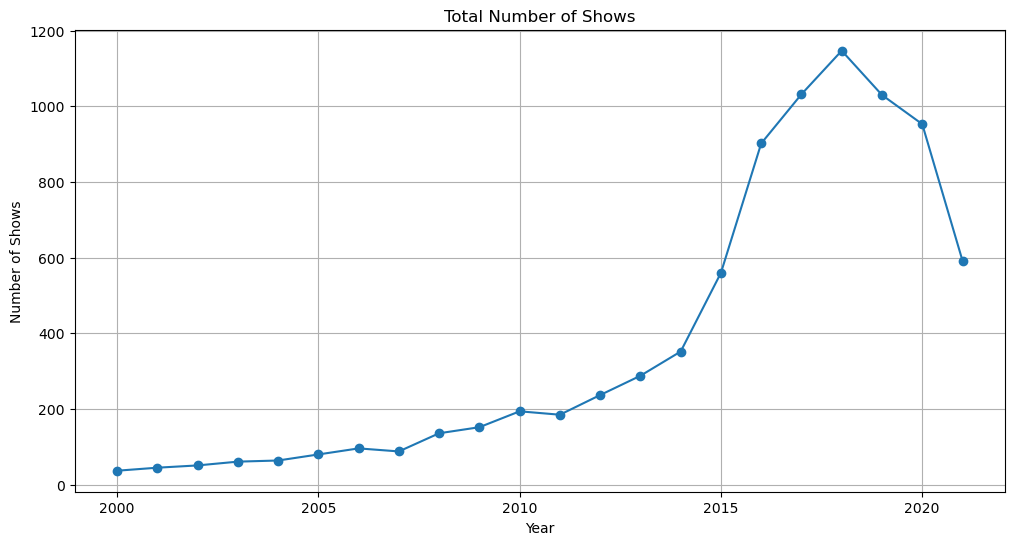

In [112]:
import matplotlib.pyplot as plt

df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df_since_2000 = df[df['release_year'] >= 2000]
count_by_year = df_since_2000.groupby('release_year').size()

plt.figure(figsize=(12, 6))
plt.plot(count_by_year.index, count_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.title('Total Number of Shows')
plt.grid(True)
plt.show()

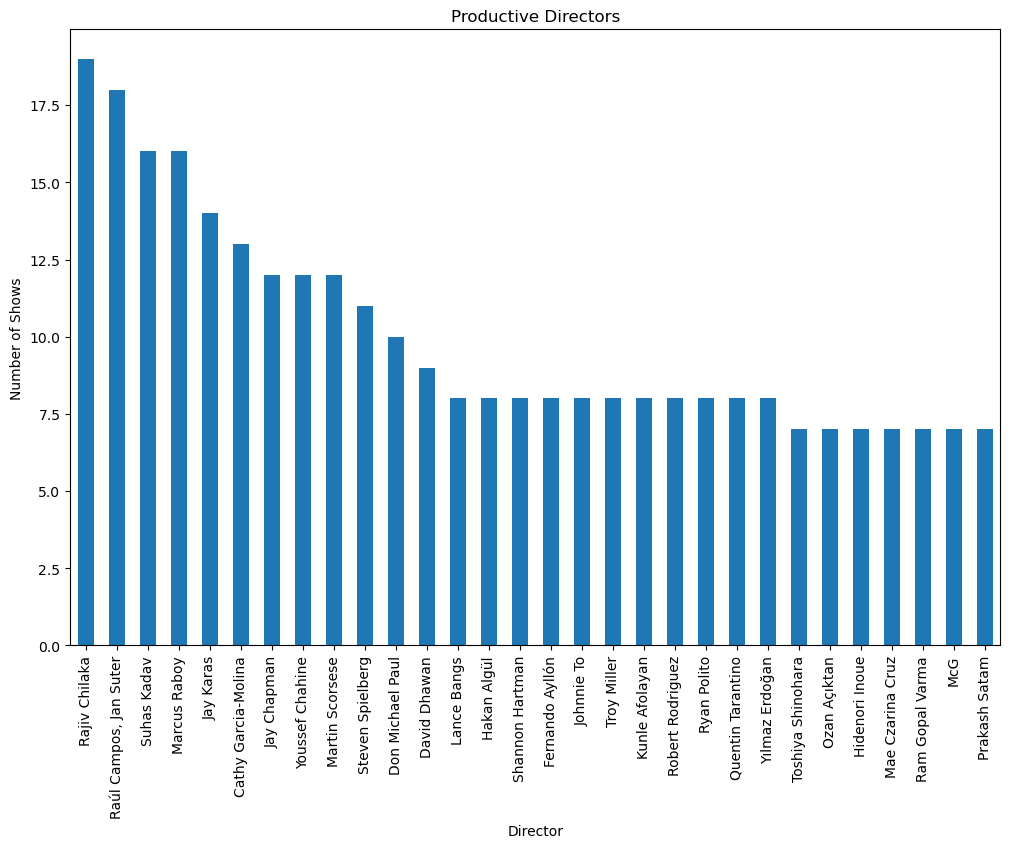

In [113]:
director_counts = df.groupby('director').size()
top_directors = director_counts.sort_values(ascending=False).head(30)

plt.figure(figsize=(12, 8))
top_directors.plot(kind='bar')
plt.xlabel('Director')
plt.ylabel('Number of Shows')
plt.title('Productive Directors')
plt.xticks(rotation=90)
plt.show()

#### Line chart

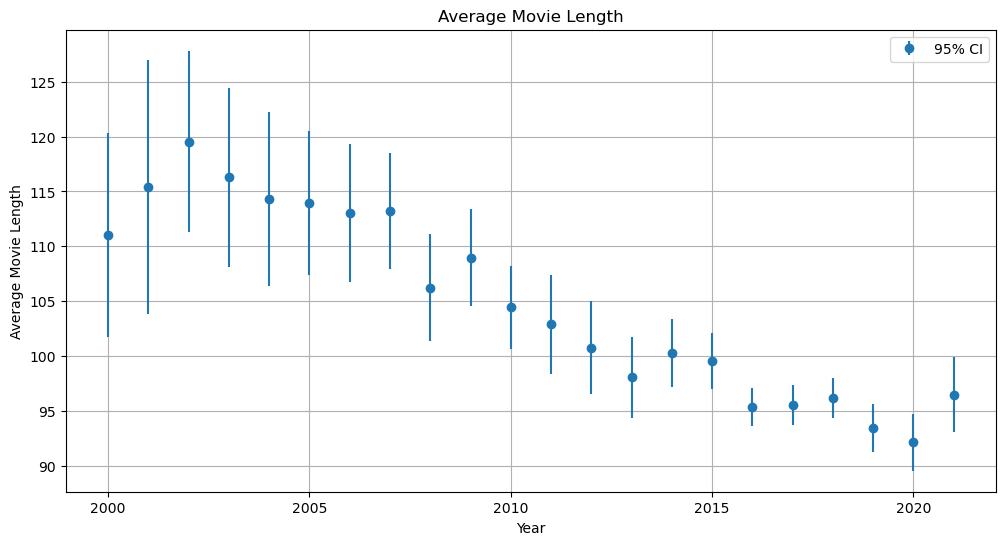

In [114]:
from scipy import stats

df['duration'] = pd.to_numeric(df['duration'].str.replace(' min', ''), errors='coerce')
df_since_2000 = df[df['release_year'] >= 2000]
grouped_data = df_since_2000.groupby('release_year')['duration'].agg(['mean', 'std', 'count'])
grouped_data['ci95_hi'] = grouped_data['mean'] + 1.96 * (grouped_data['std'] / np.sqrt(grouped_data['count']))
grouped_data['ci95_lo'] = grouped_data['mean'] - 1.96 * (grouped_data['std'] / np.sqrt(grouped_data['count']))

plt.figure(figsize=(12, 6))
plt.errorbar(grouped_data.index, grouped_data['mean'], yerr=[grouped_data['mean'] - grouped_data['ci95_lo'], grouped_data['ci95_hi'] - grouped_data['mean']], fmt='o', label='95% CI')
plt.xlabel('Year')
plt.ylabel('Average Movie Length')
plt.title('Average Movie Length')
plt.grid(True)
plt.legend()
plt.show()

#### Line plot

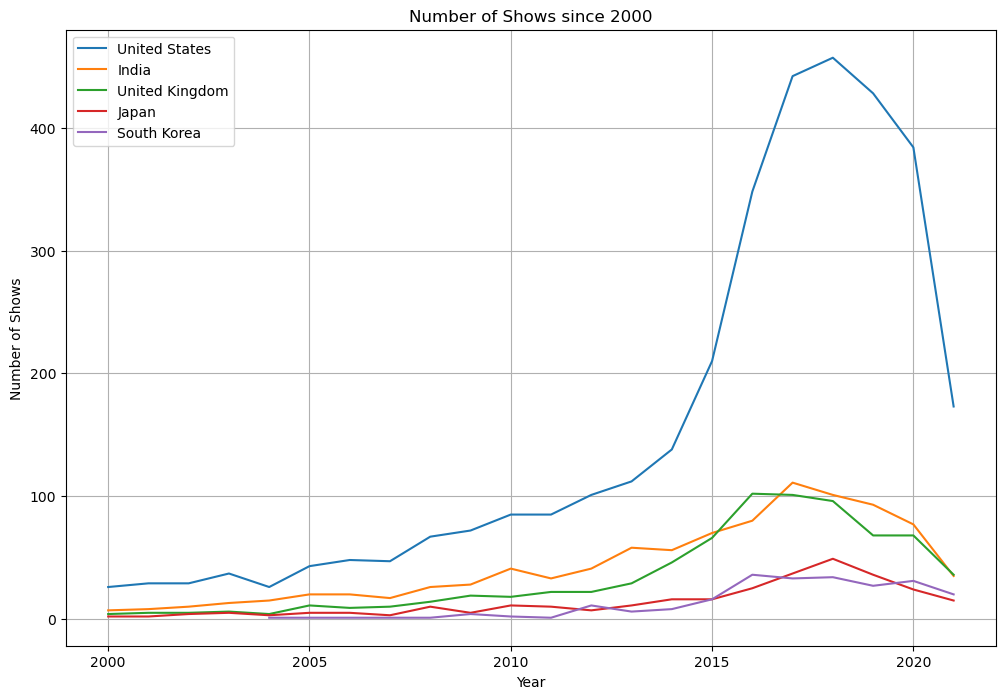

In [115]:
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df_since_2000 = df[df['release_year'].notnull() & (df['release_year'] >= 2000)]
countries = ['United States', 'India', 'United Kingdom', 'Japan', 'South Korea']
country_dfs = {country: df_since_2000[df_since_2000['country'].str.contains(country, case=False, na=False)] for country in countries}

grouped_data = {country: country_df.groupby('release_year').size() for country, country_df in country_dfs.items()}

plt.figure(figsize=(12, 8))
for country, data in grouped_data.items():
    plt.plot(data.index, data.values, label=country)

plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.title('Number of Shows since 2000')
plt.legend()
plt.grid(True)
plt.show()

#### Map plot

/var/folders/mr/s3fqy7jn1hvc_6m53bkhgcp80000gn/T/ipykernel_35725/3480463498.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


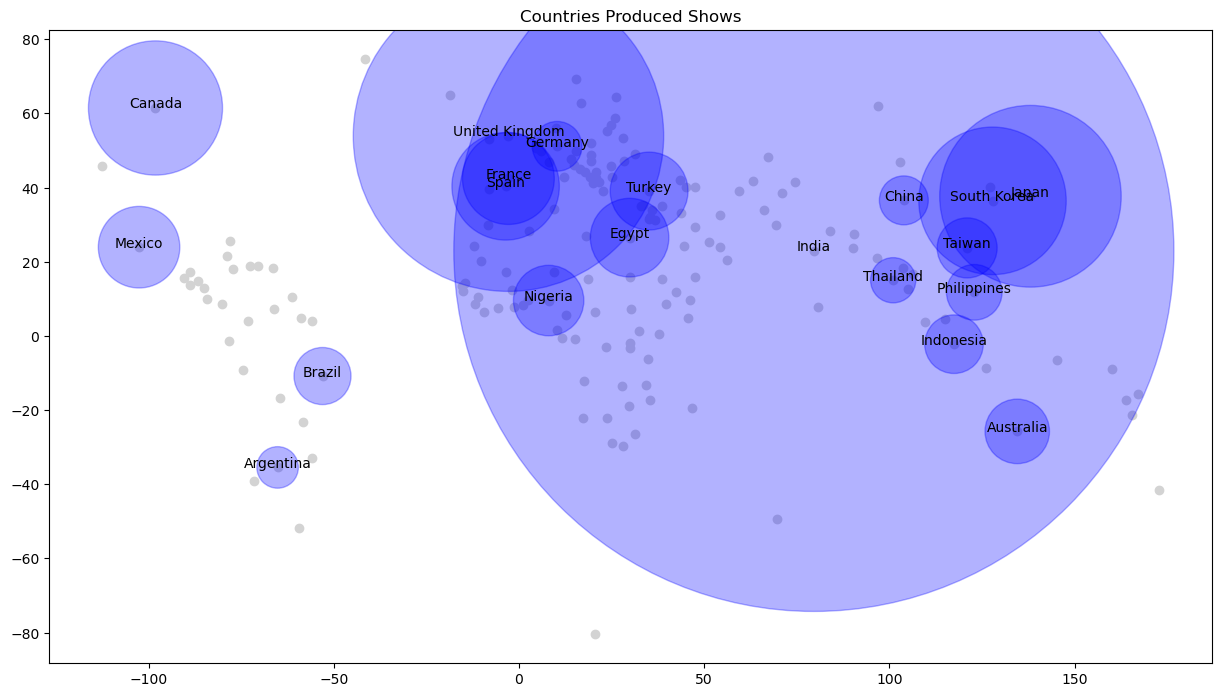

In [119]:
import geopandas as gpd
from shapely.geometry import Point
from geopandas.tools import geocode

country_counts = df.groupby('country').size().reset_index(name='count')
popular_countries = country_counts[country_counts['count'] > 50]

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(popular_countries, how='left', left_on='name', right_on='country')
world['geometry'] = world['geometry'].apply(lambda x: Point(x.centroid.x, x.centroid.y))

gdf = gpd.GeoDataFrame(world, geometry='geometry')
fig, ax = plt.subplots(figsize=(15, 10))
gdf.plot(ax=ax, color='lightgrey')

for idx, row in gdf.iterrows():
    if not pd.isnull(row['count']):
        plt.annotate(text=row['name'], xy=(row['geometry'].x, row['geometry'].y), horizontalalignment='center')
        ax.add_artist(plt.Circle((row['geometry'].x, row['geometry'].y), row['count']*0.1, color='blue', alpha=0.3))

plt.title('Countries Produced Shows')
plt.show()